# DBSCAN Example

## Needed libraries

In [1]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np

## Sintetic data

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05)


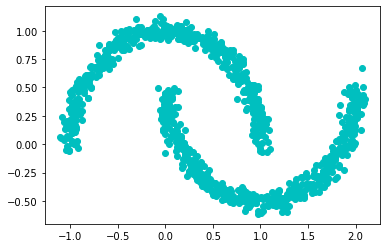

In [3]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c="c")
plt.show()

# DBSCAN

- eps: two points are considered neighbors if the distance between the two points is below the threshold epsilon.
- min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
- metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

In [83]:
def dbscan(e,ms,X):
    dbscan = DBSCAN(eps=e, min_samples=ms)
    dbscan.fit(X)
    clusters = dbscan.labels_
    
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 
          'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
    plt.title("DBSCAN, eps: " + str(e) + " min_samples: " + str(ms))
    plt.show()
    
    values, counts = np.unique(clusters, return_counts=True)
    print("values:", values, "counts:", counts)

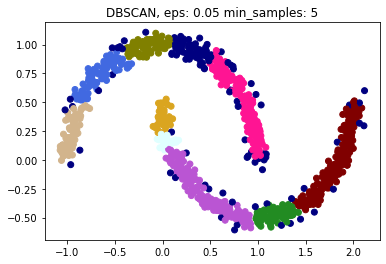

values: [-1  0  1  2  3  4  5  6  7  8  9 10] counts: [ 68  94 172  70 167  79 144  74  42  23  62   5]


In [84]:
dbscan(0.05, 5, X)

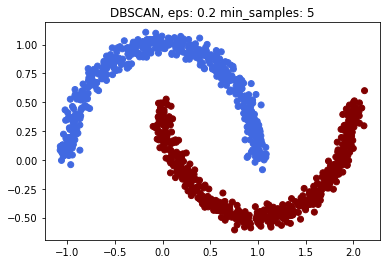

values: [0 1] counts: [500 500]


In [85]:
dbscan(0.20, 5, X)

## How can we  determine the best epsilon?

Check: 
- Rahmah, Nadia, and Imas Sukaesih Sitanggang. *"Determination of optimal epsilon (eps) value on dbscan algorithm to clustering data on peatland hotspots in sumatra."* IOP conference series: earth and environmental science. Vol. 31. No. 1. IOP Publishing, 2016. [Link](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)
- Main idea: To calculate the average distance between each point and its k nearest neighbors, where k = the min_samples value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for epsilon at the point of maximum curvature (i.e. where the graph has the greatest slope).

